In [1]:
import pandas as pd

dataset = pd.read_csv('KAG_conversion_data.csv')
dataset.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [2]:
dataset.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


# Statistike

<Figure size 432x288 with 0 Axes>

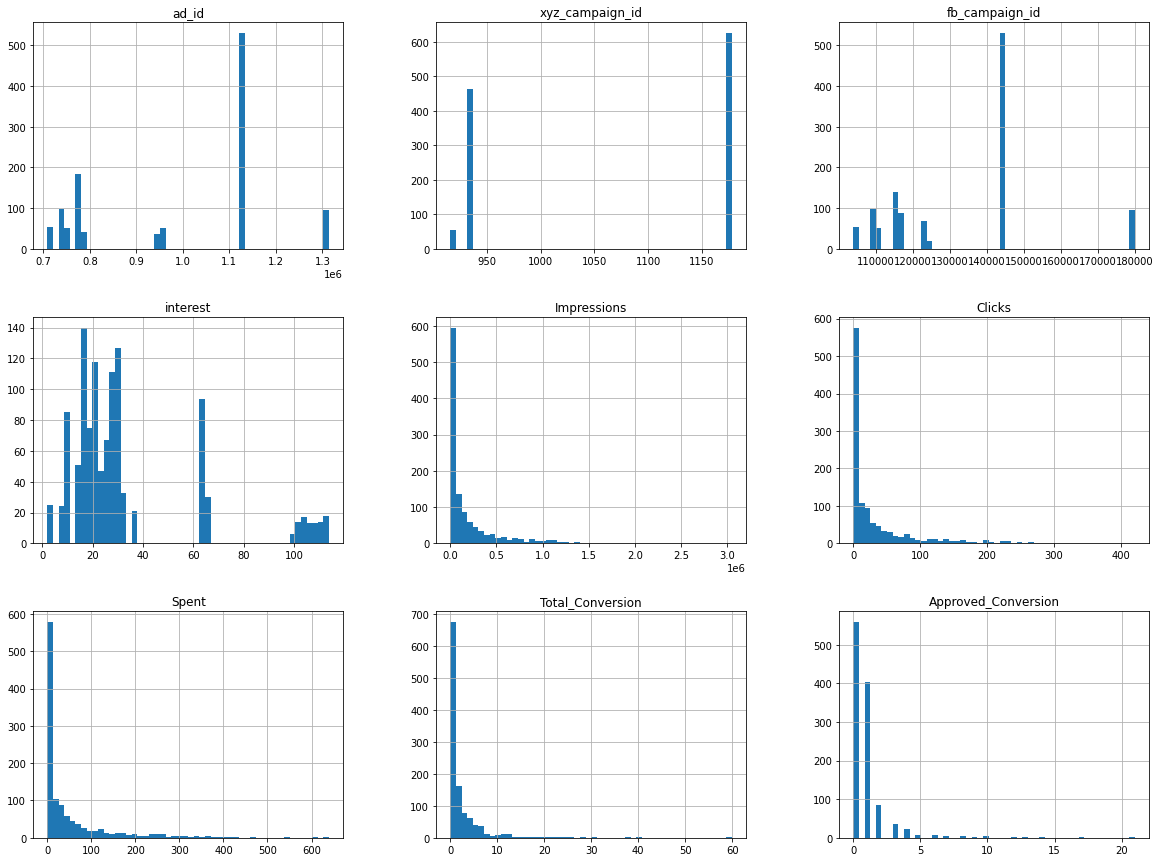

In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


plt.set_cmap("Greens")
dataset.hist(bins=50, figsize=(20,15))

plt.show()

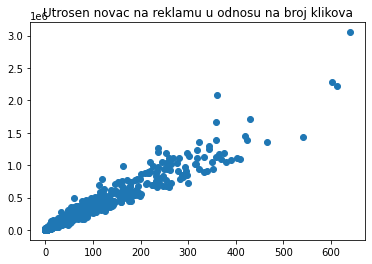

In [4]:
plt.title('Utrosen novac na reklamu u odnosu na broj klikova')
plt.scatter( dataset['Spent'], dataset['Impressions'])

<AxesSubplot:title={'center':'Broj prikazivanja reklame(Impressions) za svaki pol(gender-M, F) '}, xlabel='gender'>

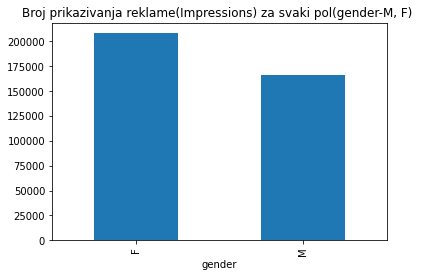

In [5]:
plt.title('Broj prikazivanja reklame(Impressions) za svaki pol(gender-M, F) ')
dataset.groupby('gender')['Impressions'].mean().plot.bar()

In [6]:
categores = ['age', 'gender']
for x in categores:
    print(dataset[x].value_counts())

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
M    592
F    551
Name: gender, dtype: int64


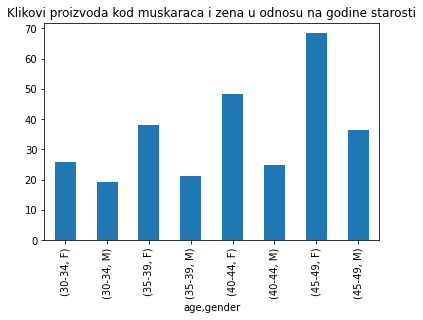

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

dataset.groupby(categores)['Clicks'].mean().plot.bar()
plt.title('Klikovi proizvoda kod muskaraca i zena u odnosu na godine starosti')

plt.show()

<Figure size 720x576 with 0 Axes>

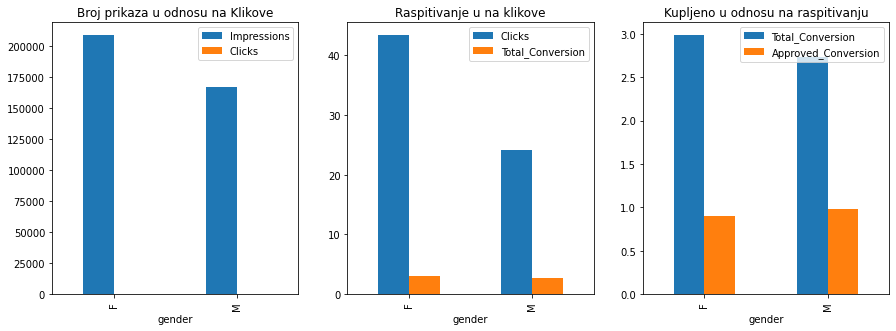

In [8]:
plt.figure(figsize=(10,8))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes = axes.flatten()

axes[0].set_title('Broj prikaza u odnosu na Klikove')
dataset.groupby('gender')['Impressions', 'Clicks'].mean().plot.bar(ax = axes[0])
axes[1].set_title('Raspitivanje u na klikove')
dataset.groupby('gender')['Clicks','Total_Conversion'].mean().plot.bar(ax = axes[1])
axes[2].set_title('Kupljeno u odnosu na raspitivanju')
dataset.groupby('gender')['Total_Conversion', 'Approved_Conversion'].mean().plot.bar(ax = axes[2])


plt.show()

## Kategorički podaci

### Konverzija u numericki tip

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for x in categores:
    dataset[x]= le.fit_transform(dataset[x])
    print(x, le.classes_)

age ['30-34' '35-39' '40-44' '45-49']
gender ['F' 'M']


### Brisanje ID kolone

In [10]:
dataset.drop('ad_id', inplace = True, axis = 1)
dataset.drop('xyz_campaign_id', inplace = True, axis = 1)
dataset.drop('fb_campaign_id', inplace = True, axis = 1)

<AxesSubplot:>

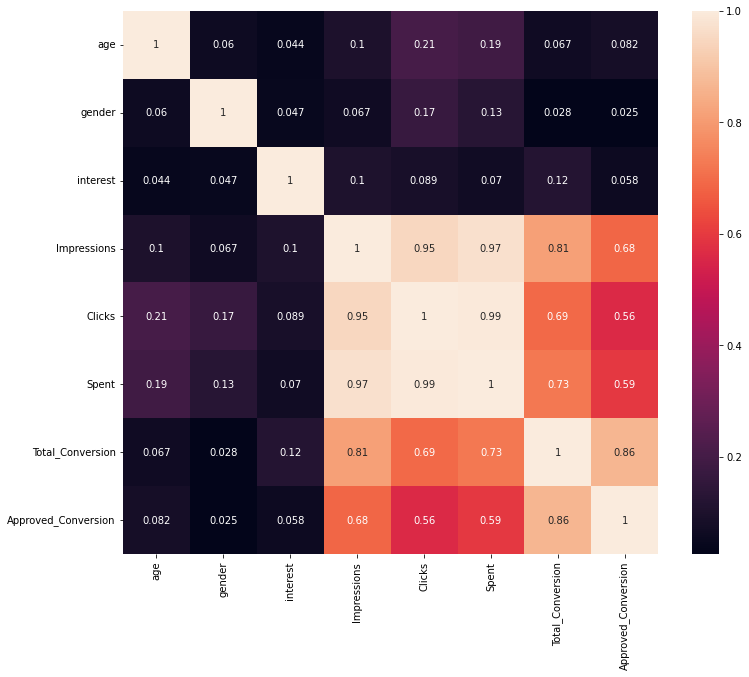

In [11]:
import seaborn as sns 
fig= plt.figure(figsize=(12,10))

sns.heatmap(dataset.corr().abs() , annot= True)

In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

relatedData = dataset.copy()
relatedData= relatedData[['Impressions', 'Clicks', 'Spent']]

In [13]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
dataset_scaled = pd.DataFrame(scale.fit_transform(relatedData) ,columns = relatedData.columns)

# Dendogram

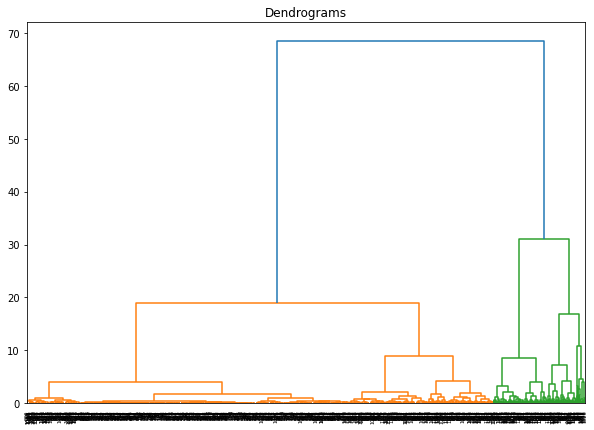

In [14]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataset_scaled, method='ward'))

# Klasterizacija

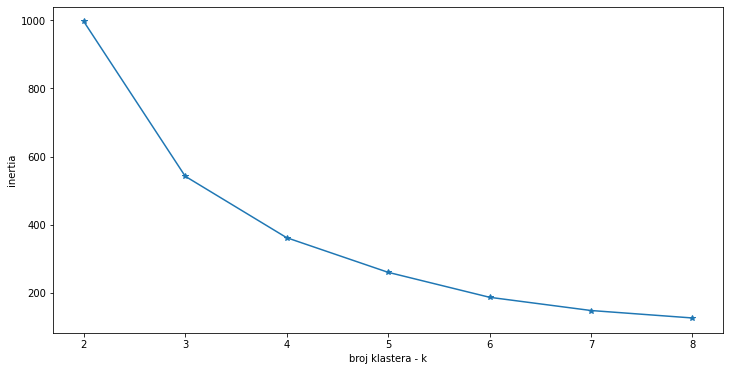

,inertia,silhoutte score
k,,
2.0,996.484579,0.792779
3.0,542.242519,0.711813
4.0,361.891744,0.691834
5.0,260.272037,0.656883
6.0,186.991983,0.654078
7.0,148.175084,0.641973
8.0,126.286565,0.622812


In [15]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia= []
k= np.arange(2,9)
for i in k:
    model = KMeans(n_clusters= i, max_iter=5)
    pred = model.fit_predict(dataset_scaled.values)
    score = silhouette_score(dataset_scaled.values, pred)
    inertia.append(pd.Series({'k': i,
                              'inertia': model.inertia_,
                              'silhoutte score': score,
                             }))
    
inertias= pd.concat(inertia, axis=1).T.set_index('k')

plt.figure(figsize=(12,6))
plt.plot(inertias.index, inertias['inertia'], '-*')
plt.xlabel('broj klastera - k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()
    
inertias

## Vizuelizacija

In [16]:
from mpl_toolkits.mplot3d import Axes3D # 3d plot



def Draw3D(scaled_data, elev = 30, azim = 300):
    fig = plt.figure(figsize = (10,10))
    fig = plt.figure(1)
    plt.clf()
    ax = Axes3D(fig, 
                rect = [0, 0, .95, 1], 
                elev = elev, 
                azim = azim)

    plt.cla()
    ax.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], scaled_data.iloc[:, 2], 
               c = scaled_data['Cluster'], 
               s = 200, 
               cmap = 'spring', 
               alpha = 0.5, 
               edgecolor = 'darkgrey')
    ax.set_xlabel(scaled_data.columns[0], fontsize = 16)
    ax.set_ylabel(scaled_data.columns[1], fontsize = 16)
    ax.set_zlabel(scaled_data.columns[2], fontsize = 16)

    plt.show()
    
def DrawGraphs(scaled_data, model_centers, predict):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
    permutaiotions = [[0, 1], [0, 2], [1, 2]]
    for perm, ax in zip(permutaiotions, axes.flatten()):
        ax.scatter(scaled_data.iloc[:, perm[0]], scaled_data.iloc[:, perm[1]], c= predict, s=50, cmap='viridis')
        centers = model_centers
        ax.scatter(centers[:, perm[0]], centers[:, perm[1]], c='black', s=200, alpha=0.5);
        ax.set_xlabel(scaled_data.columns[perm[0]]) 
        ax.set_ylabel(scaled_data.columns[perm[1]]) 
    plt.tight_layout()  
    plt.show()
    
def DrawShilloueteGraph(data, x_label, y_label):
    plt.figure(figsize=(12,6))
    plt.plot(data.index, data[y_label], '-*')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

import sklearn.metrics as metrics
result_table = pd.DataFrame({'name': ['Davies Bouldin score', 'Calinski harabasz score', 'Silhouette score']})

def AppendToResultTable(model, name, data):
    append_data = pd.DataFrame({ name: [metrics.davies_bouldin_score(data, model.labels_),
                                metrics.calinski_harabasz_score(data, model.labels_),
                                metrics.silhouette_score(data, model.labels_)]})
    global result_table
    result_table = result_table.join(append_data)

### KMeans

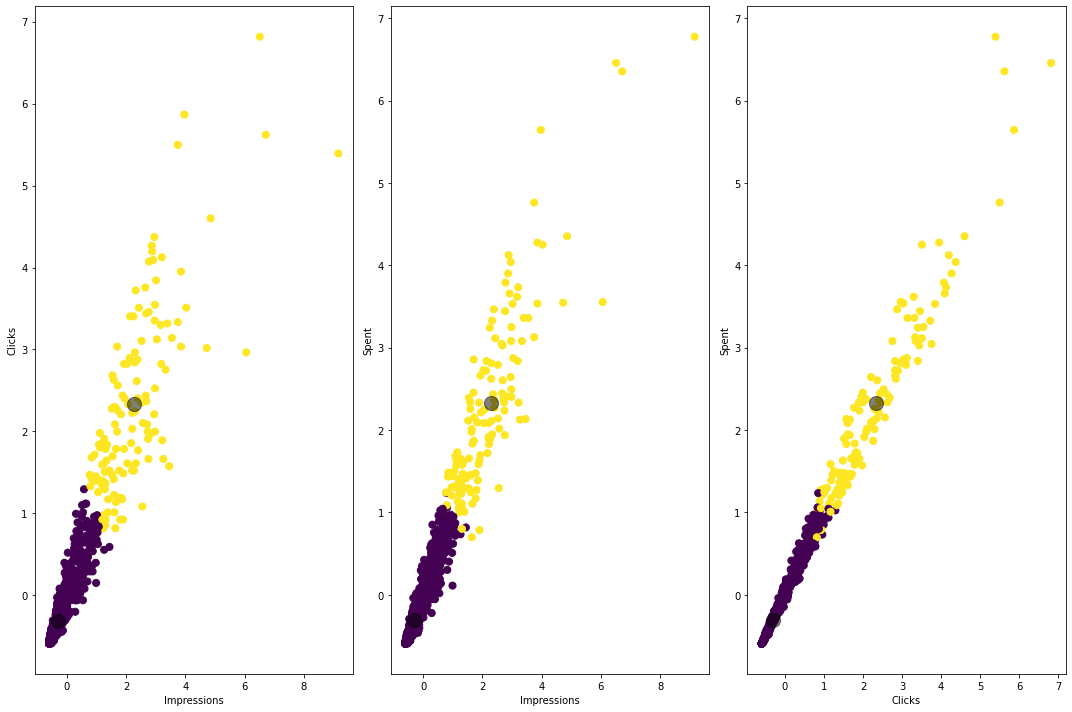

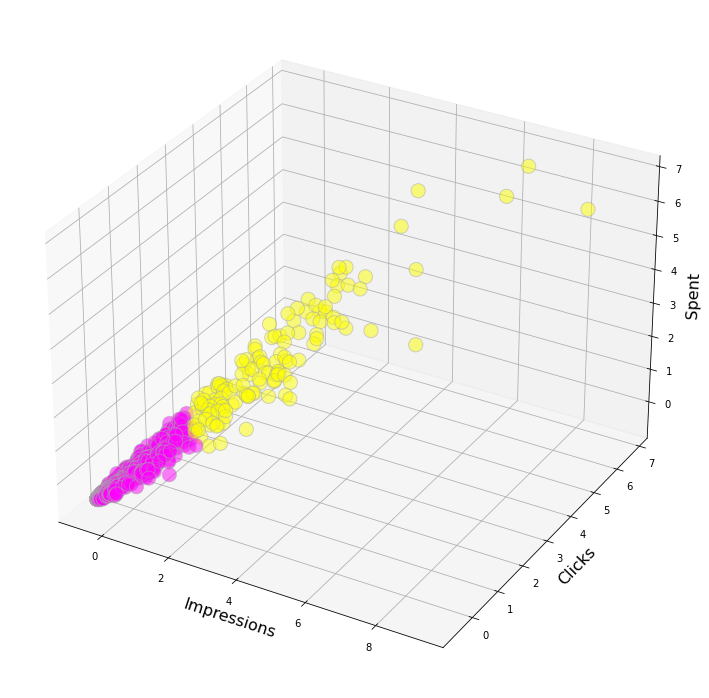

In [17]:
model = KMeans(n_clusters= 2, max_iter=5)
model.fit(dataset_scaled.values)
predict = model.predict(dataset_scaled)

AppendToResultTable(model, 'KMeans', dataset_scaled)

DrawGraphs(dataset_scaled, model.cluster_centers_, predict)
dataset_scaled['Cluster'] = model.labels_
Draw3D(dataset_scaled)

### Agglomerative 

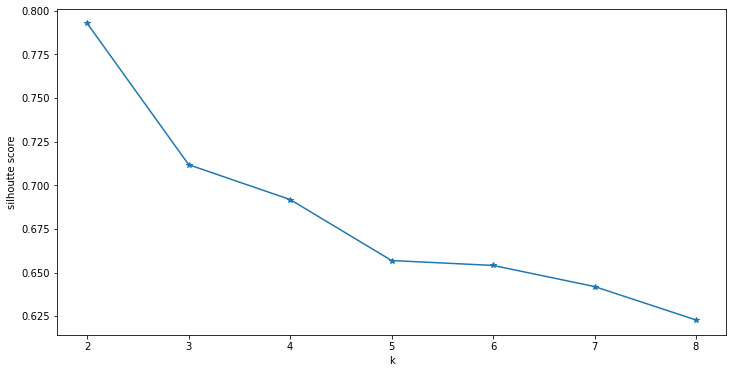

In [18]:
shilouette_data = []
k= np.arange(2,9)
for i in k:
    model = AgglomerativeClustering(n_clusters=i)
    pred = model.fit_predict(dataset_scaled.values)
    score = silhouette_score(dataset_scaled.values, pred)
    shilouette_data.append(pd.Series({'k': i,
                              'silhoutte score': score,
                             }))    
    
shilouette_data= pd.concat(inertia, axis=1).T.set_index('k')
DrawShilloueteGraph(shilouette_data, 'k', 'silhoutte score')



In [19]:
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative.fit(dataset_scaled.values) 
AppendToResultTable(agglomerative, 'Agglomerative', dataset_scaled)


### MiniBatchKMeans

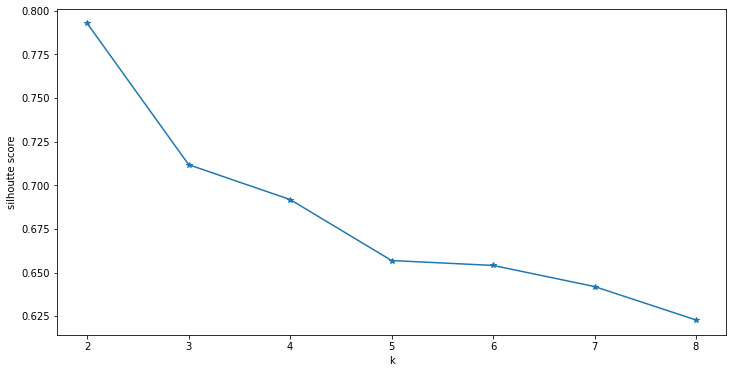

In [20]:
shilouette_data = []
k= np.arange(2,9)
for i in k:
    model = MiniBatchKMeans(n_clusters=i)
    pred = model.fit_predict(dataset_scaled.values)
    score = silhouette_score(dataset_scaled.values, pred)
    shilouette_data.append(pd.Series({'k': i,
                              'silhoutte score': score,
                             }))    
shilouette_data= pd.concat(inertia, axis=1).T.set_index('k')
DrawShilloueteGraph(shilouette_data, 'k', 'silhoutte score')

In [21]:
miniBatch = MiniBatchKMeans(n_clusters=2)
miniBatch.fit(dataset_scaled.values) 
AppendToResultTable(miniBatch, 'MiniBatchKMeans', dataset_scaled)

### Meanshift

In [22]:
meanshift = MeanShift(n_jobs=-1)
meanshift.fit(dataset_scaled.values)
AppendToResultTable(meanshift, 'Meanshift', dataset_scaled)

### DBScan

In [23]:
dbscan = DBSCAN(n_jobs=-1)
dbscan.fit(dataset_scaled.values)
AppendToResultTable(dbscan, 'DBScan', dataset_scaled)

### Result

In [24]:
result_table

,name,KMeans,Agglomerative,MiniBatchKMeans,Meanshift,DBScan
0,Davies Bouldin score,0.467652,0.456680,0.456680,0.480787,0.759117
1,Calinski harabasz score,2785.291568,2920.737136,2920.737136,813.814379,1960.664319
2,Silhouette score,0.792779,0.801595,0.801595,0.691983,0.777971


In [25]:
pred = meanshift.predict(dataset_scaled.values)
score = silhouette_score(dataset_scaled.values, pred)
print(score)

print(metrics.silhouette_score(dataset_scaled, meanshift.labels_))

0.6919832359251366
0.6919832359251366


# PCA

In [26]:
from sklearn.decomposition import PCA

data_copy = dataset.copy()
scale= StandardScaler()
pca_data = pd.DataFrame(scale.fit_transform(data_copy), columns = data_copy.columns)
pca = PCA(n_components=len(pca_data.columns))
components = pca.fit_transform(pca_data)
components

array([[-1.02609264,  1.49715135, -0.42757044, ..., -0.06958   ,
         0.1412707 , -0.00888003],
       [-1.21992188,  1.29055433, -0.42343189, ...,  0.27464048,
         0.11483388, -0.02304121],
       [-1.35928983,  1.22200393, -0.29789368, ...,  0.1009961 ,
         0.09883236, -0.00727879],
       ...,
       [-0.12640267, -2.18984992,  2.51263186, ...,  0.14851643,
        -0.11259927,  0.02940197],
       [ 3.58605099, -2.1389698 ,  2.29630604, ...,  0.07898612,
        -0.25966154, -0.07258186],
       [ 2.52964458, -2.16940424,  2.38811232, ..., -0.37600323,
         0.0911251 ,  0.0398241 ]])

Text(0, 0.5, 'Variance %')

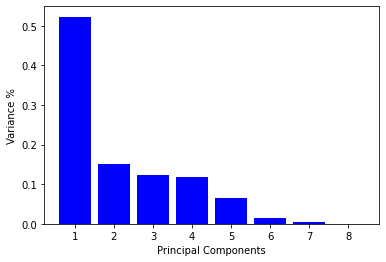

In [27]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')

Text(0, 0.5, 'PCA 5')

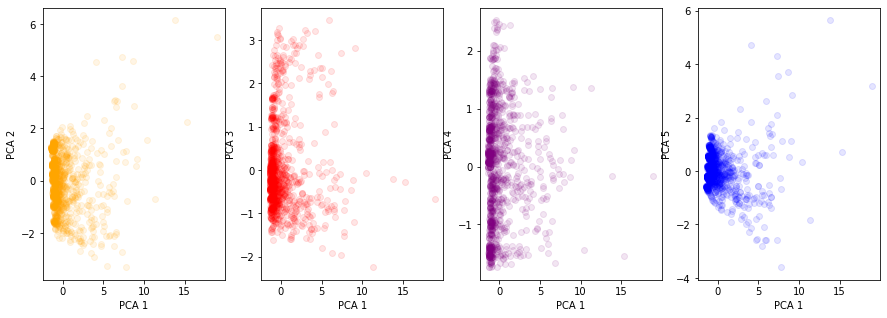

In [28]:
PCA_components = pd.DataFrame(components)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
axes = axes.flatten()


axes[0].scatter(PCA_components[0], PCA_components[1], alpha=.1, color='orange')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')

axes[1].scatter(PCA_components[0], PCA_components[2], alpha=.1, color='red')
axes[1].set_xlabel('PCA 1')
axes[1].set_ylabel('PCA 3')

axes[2].scatter(PCA_components[0], PCA_components[3], alpha=.1, color='purple')
axes[2].set_xlabel('PCA 1')
axes[2].set_ylabel('PCA 4')

axes[3].scatter(PCA_components[0], PCA_components[4], alpha=.1, color='blue')
axes[3].set_xlabel('PCA 1')
axes[3].set_ylabel('PCA 5')


## Clustering

### KMenas

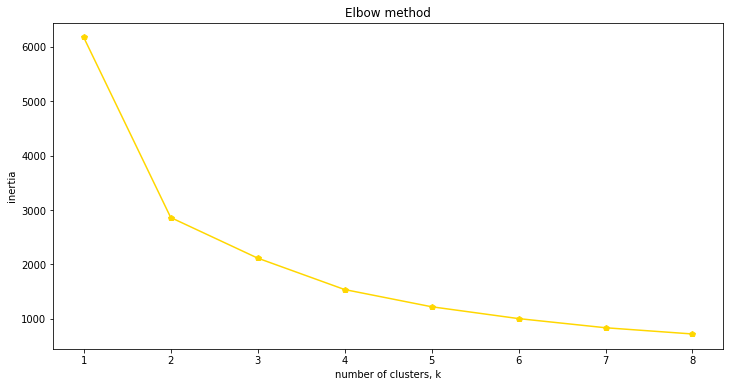

In [29]:
inertias = []

for i in range(1,9):
    model = KMeans(n_clusters = i)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.figure(figsize=(12,6)) 
plt.plot(range(1,9), inertias, '-p', color='gold')
plt.title('Elbow method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

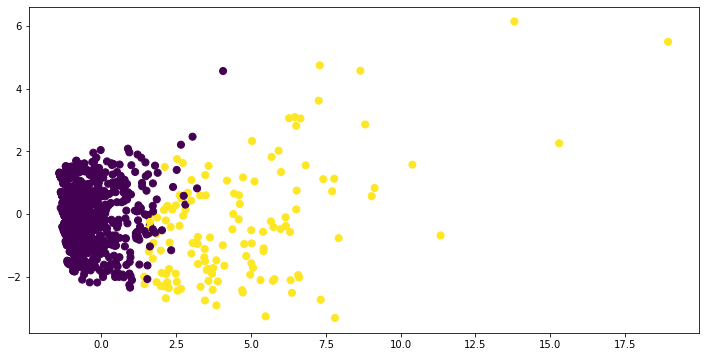

In [30]:
model = KMeans(n_clusters=2)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.figure(figsize=(12,6)) 
plt.scatter(PCA_components[0], PCA_components[1], c= predict, s=50, cmap='viridis')
plt.show()

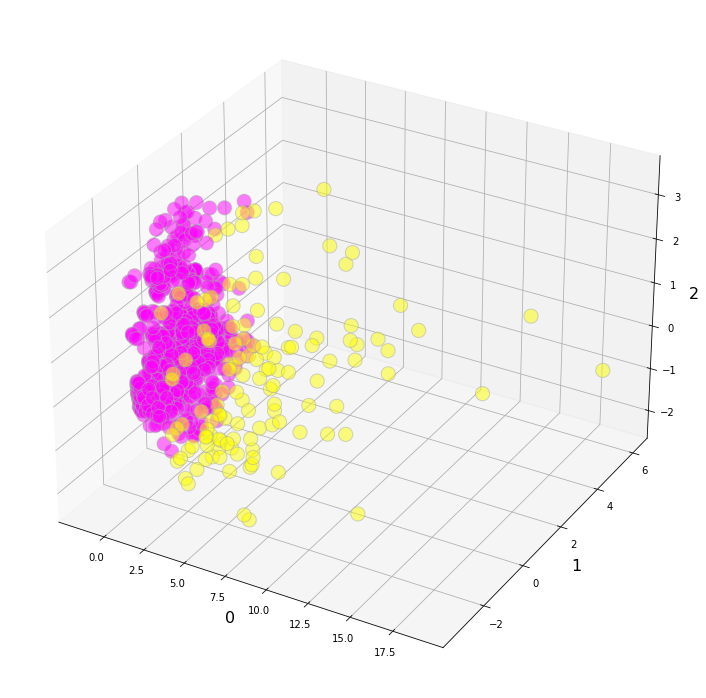

In [31]:
PCA_components['Cluster'] = model.labels_
Draw3D(PCA_components)

In [32]:
AppendToResultTable(model, 'PCA KMeans', PCA_components.iloc[:,:2])

### Agglomerative

In [33]:
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative.fit(PCA_components.iloc[:,:2]) 
AppendToResultTable(agglomerative, 'PCA Agglomerative', PCA_components.iloc[:,:2])

### MiniBatchKMeans

In [34]:
miniBatch = MiniBatchKMeans(n_clusters=2)
miniBatch.fit(PCA_components.iloc[:,:2]) 
AppendToResultTable(miniBatch, 'PCA MiniBatchKMeans', PCA_components.iloc[:,:2])

### MeanShift

In [35]:
meanshift = MeanShift(n_jobs=-1)
meanshift.fit(PCA_components.iloc[:,:2])
AppendToResultTable(meanshift, 'PCA Meanshift', PCA_components.iloc[:,:2])

### DBSCAN

In [36]:
dbscan = DBSCAN(n_jobs=-1)
dbscan.fit(PCA_components.iloc[:,:2])
AppendToResultTable(dbscan, 'PCA DBScan', PCA_components.iloc[:,:2])

In [37]:
result_table

,name,KMeans,Agglomerative,MiniBatchKMeans,Meanshift,DBScan,PCA KMeans,PCA Agglomerative,PCA MiniBatchKMeans,PCA Meanshift,PCA DBScan
0,Davies Bouldin score,0.467652,0.456680,0.456680,0.480787,0.759117,0.682489,0.658031,0.693186,0.650416,1.370336
1,Calinski harabasz score,2785.291568,2920.737136,2920.737136,813.814379,1960.664319,1319.572002,1196.789525,1319.075519,264.445486,304.381260
2,Silhouette score,0.792779,0.801595,0.801595,0.691983,0.777971,0.686726,0.698091,0.682365,0.573531,0.547397
